# A Brief Introduction to PyTorch

In this tutorial, we try to introduce the key codes and explanation for
basic usage of pytorch. 

1. Tensor manipulation and typical loss calculation
1. Autograd
1. Optimizer
1. Modules
1. Datasets and DataLoader
1. Train on GPU and parallel on GPU

Credits:

Most codes are after the [David Bau](https://github.com/davidbau/how-to-read-pytorch), [PyTorch Official Tutorial](https://pytorch.org/tutorials/)


## Section 1. Tensor manipulation and typical loss calculation
---------------------------------------------------------------
* New tensors
* Elementwise operations
* linear algebra
* loss function
* Autograd

### create torch.tensor

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type. Typical data types of element  are torch.float, torch.long. 

In [ ]:
import torch
import numpy as np

# from list, numpy array
tensor_1 = torch.tensor([[1., -1.], [1., -1.]])
tensor_2 = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

print('Tensor 1\n', tensor_1)
print('Tensor 2\n', tensor_2)

# ones, eyes, zeros
tensor_3 = torch.zeros([2, 4], dtype=torch.int32)  
tensor_4 = torch.eye(3)
tensor_5 = torch.ones(3)

print('Tensor 3\n', tensor_3)
print('Tensor 4\n', tensor_4)
print('Tensor 5\n', tensor_5)

# from existed tensor
tensor_6 = torch.clone(tensor_5)
print("Tensor 6: a copy of tensor 5\n", tensor_6)
 
# Make a vector of 101 equally spaced numbers from 0 to 5.
x = torch.linspace(0, 5, 101)

# Print the first five things in x.
print('Create tensor by Linear space\n',x[:5])

Tensor 1
 tensor([[ 1., -1.],
        [ 1., -1.]])
Tensor 2
 tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor 3
 tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
Tensor 4
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Tensor 5
 tensor([1., 1., 1.])
Tensor 6: a copy of tensor 5
 tensor([1., 1., 1.])
Create tensor by Linear space
 tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000])


### Elementwise operations

For example, x+y, x*y, x.abs(), x.pow(3)

The shape of x is torch.Size([101])
The shape of y1=x.sin() is torch.Size([101])
The shape of y2=x ** x.cos() is torch.Size([101])
The shape of y3=y2 - y1 is torch.Size([101])
The shape of y4=y3.min() is torch.Size([]), a zero-d scalar


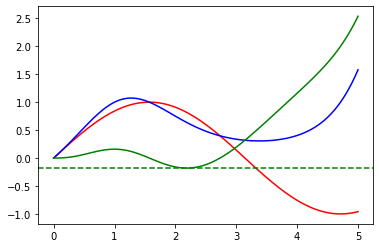

In [ ]:
import matplotlib.pyplot as plt

x = torch.linspace(0, 5, 101)
#y1, y2 = x.sin(), x ** x.cos()
y1,y2 = torch.sin(x), x**torch.cos(x)
y3 = y2 - y1
y4 = y3.min()

# Print and plot some answers.
print(f'The shape of x is {x.shape}')
print(f'The shape of y1=x.sin() is {y1.shape}')
print(f'The shape of y2=x ** x.cos() is {y2.shape}')
print(f'The shape of y3=y2 - y1 is {y3.shape}')
print(f'The shape of y4=y3.min() is {y4.shape}, a zero-d scalar')

plt.plot(x, y1, 'red', x, y2, 'blue', x, y3, 'green')
plt.axhline(y4, color='green', linestyle='--')
plt.show()

### linear algebra

In [ ]:
A = torch.tensor([[1,2],[3,4]])
B = torch.tensor([[1,1],[1,1]])
x = torch.tensor([1,1])
print(A.mm(B))       # matrix multiplication [dim1,dim2], [dim3,dim4]
print(A.mv(x))       # matrix-vector multiplication [dim1, dim2], [dim3]
print(x.t())         # matrix transpose


tensor([[3, 3],
        [7, 7]])
tensor([3, 7])
tensor([1, 1])


### linear Regression with Ordinary Least Square

Given $\mathbf{X}$ and $\mathbf{Y}$, find a $\mathbf{w}$ such that  $\mathbf{Xw}=\mathbf{Y}$

Derivative approach: $$
J(\mathbf{w})=\frac{1}{N}\|\mathbf{Y}-\mathbf{X} \mathbf{w}\|_{2}^{2}
$$

$$
\nabla J(\mathbf{w})=\frac{1}{N}\left(2 \mathbf{X}^{\top} \mathbf{X} \mathbf{w}-2 \mathbf{X}^{\top} \mathbf{Y}\right)
$$

$$\nabla J(\mathbf{w})=0 ⇒ 
\hat{\mathbf{w}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{Y}
$$

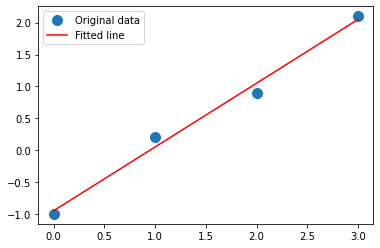

In [ ]:
x = torch.tensor([0, 1, 2, 3])
y = torch.tensor([-1, 0.2, 0.9, 2.1])

X = torch.stack([x, torch.ones(len(x))]).T # including the constant term
y = y.view(-1,1)  # change to a matrix


w = torch.inverse(X.T.mm(X)).mm(X.T).mm(y) # OLS calculation
 
y_pred = (X.mm(w)).numpy() # prediction 

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, y_pred, 'r', label='Fitted line')
plt.legend()
plt.show()

#### Solve OLS by numpy

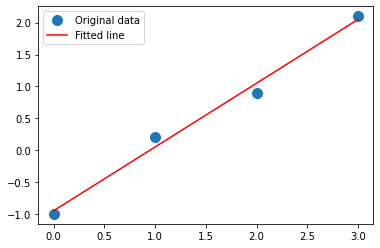

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

### loss function

In [ ]:
#nn.X                                  # where X is BCELoss, CrossEntropyLoss,
                                      # L1Loss, MSELoss, NLLLoss, SoftMarginLoss,
                                      # MultiLabelSoftMarginLoss, CosineEmbeddingLoss,
                                      # KLDivLoss, MarginRankingLoss, HingeEmbeddingLoss
                                      # or CosineEmbeddingLoss
x = torch.tensor([[1.,2.],[3.,4.]]) # logits (prepared for softmax, usually is wx)
y = torch.tensor([0,1])             # label
print(torch.nn.CrossEntropyLoss()(x,y)) # calculate the cross entropy loss 
# multi-class classification

x = torch.tensor([0.2, 0.7])          # value after sigmoid
y = torch.tensor([0.,1.])             # label
print(torch.nn.BCELoss()(x,y))        # calculate the binary cross entropy loss 
# binary classification

tensor(0.8133)
tensor(0.2899)


### Autograd
--------------------

If set 'x.requires_grad=True', pytorch will automatically keep tracking the computational history of the tensors derived from 'x'. Thus, pytorch is able to provide the derivatives of 'x' based on computation. 

The function `torch.autograd.grad(output_scalar, [list of input_tensors])` computes `d(output_scalar)/d(input_tensor)` for each input tensor component in the list.  For it to work, the input tensors and output must be part of the same `requires_grad=True` compuation.

In the example above, `x` is explicitly marked `requires_grad=True`, so `y.sum()`, which is derived from `x`, automatically comes along with the computation history, and can be differentiated.

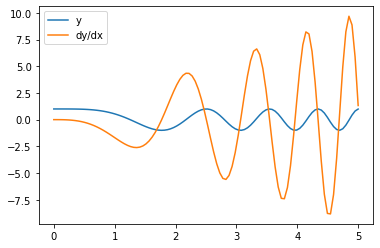

In [ ]:
import torch
from matplotlib import pyplot as plt

x = torch.linspace(0, 5, 100, requires_grad=True)
y = (x**2).cos()
dydx = torch.autograd.grad(y.sum(), [x])[0]

plt.plot(x.detach(), y.detach(), label='y')
plt.plot(x.detach(), dydx, label='dy/dx')
plt.legend()
plt.show()

#### Backprop and In-place gradients
-------------------------------

Typical way to obtain the gradient is via `backward()`.

**Using `backward()` to add `.grad` attributes.** To simplify this common operation, pytorch provides the `y.backward()` method, which computes the gradients of y with respect to every tracked dependency, and stores the results in the field `x.grad` for every original input vector `x` that was marked as `requires_grad=True`.

tensor([-0.0000e+00, -2.5765e-04, -2.0612e-03, -6.9560e-03, -1.6485e-02,
        -3.2185e-02, -5.5575e-02, -8.8145e-02, -1.3133e-01, -1.8650e-01,
        -2.5487e-01, -3.3752e-01, -4.3528e-01, -5.4869e-01, -6.7791e-01,
        -8.2262e-01, -9.8193e-01, -1.1543e+00, -1.3373e+00, -1.5279e+00,
        -1.7218e+00, -1.9138e+00, -2.0978e+00, -2.2665e+00, -2.4118e+00,
        -2.5246e+00, -2.5954e+00, -2.6144e+00, -2.5720e+00, -2.4592e+00,
        -2.2684e+00, -1.9940e+00, -1.6330e+00, -1.1861e+00, -6.5843e-01,
        -5.9786e-02,  5.9438e-01,  1.2829e+00,  1.9791e+00,  2.6508e+00,
         3.2620e+00,  3.7737e+00,  4.1467e+00,  4.3434e+00,  4.3315e+00,
         4.0872e+00,  3.5983e+00,  2.8676e+00,  1.9159e+00,  7.8273e-01,
        -4.7262e-01, -1.7729e+00, -3.0265e+00, -4.1327e+00, -4.9894e+00,
        -5.5028e+00, -5.5970e+00, -5.2252e+00, -4.3782e+00, -3.0925e+00,
        -1.4526e+00,  4.1007e-01,  2.3249e+00,  4.0956e+00,  5.5192e+00,
         6.4094e+00,  6.6222e+00,  6.0798e+00,  4.7

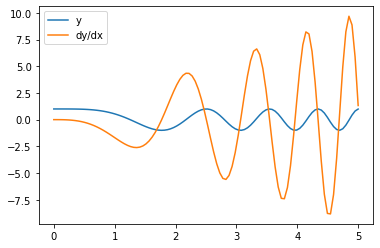

In [ ]:
x = torch.linspace(0, 5, 100, requires_grad=True)
y = (x**2).cos()
y.sum().backward()   # populates the grad attribute below.
print(x.grad)

plt.plot(x.detach(), y.detach(), label='y')
plt.plot(x.detach(), x.grad, label='dy/dx')
plt.legend()
plt.show()

## Section 2. Optimizer
-----------


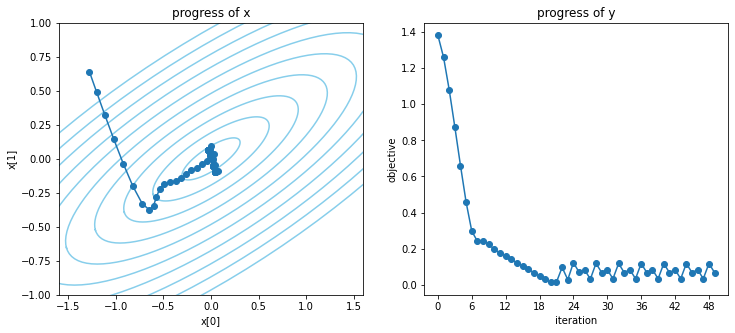

In [ ]:
import torch

#@title Run this cell to setup visualization...
# This cell defines plot_progress() which plots an optimization trace.

import matplotlib
from matplotlib import pyplot as plt

# This function is to facilitate the plot, just skip it.
def plot_progress(bowl, track, losses):
    # Draw the contours of the objective function, and x, and y
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))
    for size in torch.linspace(0.1, 1.0, 10):
        angle = torch.linspace(0, 6.3, 100)
        circle = torch.stack([angle.sin(), angle.cos()])
        ellipse = torch.mm(torch.inverse(bowl), circle) * size
        ax1.plot(ellipse[0,:], ellipse[1,:], color='skyblue')
    track = torch.stack(track).t()
    ax1.set_title('progress of x')
    ax1.plot(track[0,:], track[1,:], marker='o')
    ax1.set_ylim(-1, 1)
    ax1.set_xlim(-1.6, 1.6)
    ax1.set_ylabel('x[1]')
    ax1.set_xlabel('x[0]')
    ax2.set_title('progress of y')
    ax2.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    ax2.plot(range(len(losses)), losses, marker='o')
    ax2.set_ylabel('objective')
    ax2.set_xlabel('iteration')
    fig.show()

x_init = torch.randn(2)
x = x_init.clone()
x.requires_grad = True
optimizer = torch.optim.SGD([x], lr=0.1, momentum=0.5)

bowl = torch.tensor([[ 0.4410, -1.0317], [-0.2844, -0.1035]])
track, losses = [], []

for iter in range(50):
    objective = torch.mm(bowl, x[:,None]).norm()   # calculate the loss
    optimizer.zero_grad()           # zero_grad : make the grad to 0
    objective.backward()            # backward: back propagation, new - grad
    optimizer.step()                # step : gradient, x = x - lr*x.grad
    
    track.append(x.detach().clone())
    losses.append(objective.detach())
    
plot_progress(bowl, track, losses)

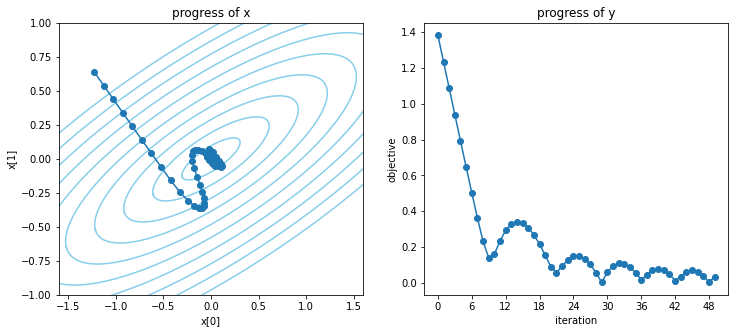

In [ ]:
# The code below uses Adam
x = x_init.clone()
x.requires_grad = True
optimizer = torch.optim.Adam([x], lr=0.1)

track, losses = [], []

for iter in range(50):
    objective = torch.mm(bowl, x[:,None]).norm()
    optimizer.zero_grad()
    objective.backward()
    optimizer.step()
    track.append(x.detach().clone())
    losses.append(objective.detach())
    
plot_progress(bowl, track, losses)

## Section 3. Modules
----------------------------

The linear layer is a good starting example: it is the fundmental workhorse of all neural networks, so as simple as it is, it is worth examining carefully.

`torch.nn.Linear` implements the function `y = Ax + b`, which takes m-dimensional input `x` and produces n-dimensional output `y`, by multiplying by the n &times; m matrix `A` (whose specific values are called the `weight`) and adding n-dimensional vector `b` (whose values are called the `bias`).  We can make a Linear network with 3d input and 2d output just like this:


In [ ]:
import torch
net = torch.nn.Linear(3, 2)
print(net)

Linear(in_features=3, out_features=2, bias=True)


In [ ]:
net(torch.tensor([[1.0, 0.0, 0.0]]))

tensor([[0.0313, 0.3172]], grad_fn=<AddmmBackward0>)

In [ ]:
x_batch = torch.tensor([
    [1.0, 0. , 0. ],
    [0. , 1.0, 0. ],
    [0. , 0. , 1.0],
    [0. , 0. , 0. ],
])
net(x_batch)

tensor([[0.0313, 0.3172],
        [0.1884, 0.5358],
        [0.2768, 0.7898],
        [0.1886, 0.5496]], grad_fn=<AddmmBackward0>)

In [ ]:
print('weight is', net.weight)
print('bias is', net.bias)

weight is Parameter containing:
tensor([[-1.5726e-01, -1.8438e-04,  8.8215e-02],
        [-2.3236e-01, -1.3768e-02,  2.4022e-01]], requires_grad=True)
bias is Parameter containing:
tensor([0.1886, 0.5496], requires_grad=True)


In [ ]:
for name, param in net.named_parameters():
    print(f'{name} = {param}\n')

weight = Parameter containing:
tensor([[-1.5726e-01, -1.8438e-04,  8.8215e-02],
        [-2.3236e-01, -1.3768e-02,  2.4022e-01]], requires_grad=True)

bias = Parameter containing:
tensor([0.1886, 0.5496], requires_grad=True)



In [ ]:
for k, v in net.state_dict().items():
    print(f'{k}: {v.type()}{tuple(v.shape)}')

import os
os.makedirs('checkpoints', exist_ok=True)
torch.save(net.state_dict(), 'checkpoints/linear.pth')

weight: torch.FloatTensor(2, 3)
bias: torch.FloatTensor(2,)


In [ ]:
# Then later, to remember the state
net.load_state_dict(torch.load('checkpoints/linear.pth'))

<All keys matched successfully>

In [ ]:
y_batch = net(x_batch)
loss = ((y_batch - torch.tensor([[1.0, 1.0]])) ** 2).sum(1).mean()
print(f'loss is {loss}')

loss is 0.926825225353241


In [ ]:
loss.backward()
print(f'weight is {net.weight} and grad is:\n{net.weight.grad}\n')
print(f'bias is {net.bias} and grad is:\n{net.bias.grad}\n')

weight is Parameter containing:
tensor([[-1.5726e-01, -1.8438e-04,  8.8215e-02],
        [-2.3236e-01, -1.3768e-02,  2.4022e-01]], requires_grad=True) and grad is:
tensor([[-0.4843, -0.4058, -0.3616],
        [-0.3414, -0.2321, -0.1051]])

bias is Parameter containing:
tensor([0.1886, 0.5496], requires_grad=True) and grad is:
tensor([-1.6575, -0.9038])



weight is Parameter containing:
tensor([[-0.0070, -0.0070, -0.0070],
        [ 0.0041,  0.0041,  0.0041]], requires_grad=True)

bias is Parameter containing:
tensor([1.0055, 0.9968], requires_grad=True)



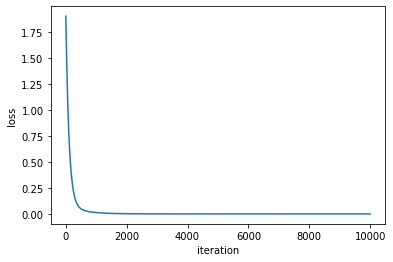

In [ ]:
net = torch.nn.Linear(3, 2)
log = []
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.5)
for _ in range(10000):
    y_batch = net(x_batch)
    loss = ((y_batch - torch.tensor([[1.0, 1.0]])) ** 2).sum(1).mean() # loss
    log.append(loss.item())
    
    optimizer.zero_grad() # zero_grad
    loss.backward()       # back propagation
    optimizer.step()      # update parameters
    
    # if without using optimizer
    # net.zero_grad()
    # loss.backward()
    # with torch.no_grad():
    #     for p in net.parameters():
    #         p -= 0.01 * p.grad
print(f'weight is {net.weight}\n')
print(f'bias is {net.bias}\n')

%matplotlib inline
import matplotlib.pyplot as plt
plt.ylabel('loss')
plt.xlabel('iteration')
plt.plot(log)

### Self defined Module
--------------------


In [ ]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()   # initialize by parent class 
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0) # ReLu
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)   # same usage as linear 

    # Compute and print loss
    loss = criterion(y_pred, y)    # loss
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()    # zero-grad
    loss.backward()          # back propagation
    optimizer.step()         # update  

99 2.1698036193847656
199 0.04534001648426056
299 0.0023285059724003077
399 0.0001614488719496876
499 1.2290578524698503e-05


## Section 4. Datasets and DataLoader

In [ ]:
# The simplest way to leverage Dataset and DataLoader
import torch
a = torch.randn(10,2)                        # feature
b = torch.randn(10,1)                        # target 
dataset_ = torch.utils.data.TensorDataset(a,b) # Construct the dataset
loader_ = torch.utils.data.DataLoader(dataset_,
                                      batch_size = 5) # Construct loader
# Check what's inside
for input, target in loader_:
  print('input',input,'\n target',target)
  print('-'*40)


input tensor([[-0.3584,  0.5904],
        [ 0.1194,  0.6232],
        [ 0.2921,  0.3180],
        [ 1.4785,  0.6415],
        [-0.4523,  0.6549]]) 
 target tensor([[-0.5847],
        [-0.3810],
        [-0.7282],
        [ 0.5234],
        [ 0.6245]])
----------------------------------------
input tensor([[-1.4279, -0.3129],
        [ 0.3965,  0.1001],
        [-1.0105,  0.4681],
        [-0.4780, -0.7528],
        [-0.1595,  1.8004]]) 
 target tensor([[-1.4972],
        [-0.6181],
        [ 0.0565],
        [-0.6553],
        [-0.4214]])
----------------------------------------


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
print(torch.__version__)
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True
train_data = torchvision.datasets.FashionMNIST(
    root = 'data/',
    train = True,
    transform=torchvision.transforms.ToTensor(), #to tensor
    download=DOWNLOAD_MNIST,
)
train_loader = Data.DataLoader(train_data,
                               batch_size = BATCH_SIZE)

1.10.0+cu111


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



torch.Size([50, 1, 28, 28])
torch.Size([50])


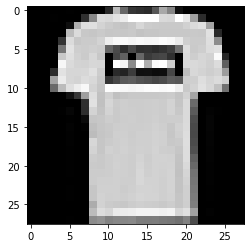

In [ ]:
features, labels = next(train_loader.__iter__())
print(features.shape)
print(labels.shape)

import matplotlib.pyplot as plt
plt.imshow(features[1].cpu().numpy().squeeze(), cmap='gray')

## Section 5. Train on GPU and parallel on GPU
------------------------------------------------------

To train on GPU, you only need to make sure your model and data are  CUDA tensor types, i.e. they are on GPU devices.



In [ ]:
# check cuda availability
print('Cuda avaiblble?', torch.cuda.is_available())

# A compromise way to set cuda, by detecting cuda availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device is :', device)

# convert the tensor
x = torch.randn(2,2)
print('cpu tensor \n', x)
x = x.to(device)
print('After changing device\n',x)

# conver the module
layer = torch.nn.Linear(2,2)
print(list(layer.parameters()))
layer = layer.to(device)
print(list(layer.parameters()))


Cuda avaiblble? True
device is : cuda
cpu tensor 
 tensor([[-1.2670,  0.1443],
        [-0.4391, -0.5272]])
After changing device
 tensor([[-1.2670,  0.1443],
        [-0.4391, -0.5272]], device='cuda:0')
[Parameter containing:
tensor([[-0.0767, -0.6567],
        [ 0.6541,  0.0046]], requires_grad=True), Parameter containing:
tensor([ 0.4471, -0.3319], requires_grad=True)]
[Parameter containing:
tensor([[-0.0767, -0.6567],
        [ 0.6541,  0.0046]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.4471, -0.3319], device='cuda:0', requires_grad=True)]


weight is Parameter containing:
tensor([[ 0.0106, -0.0158,  0.0097,  0.0234, -0.0152,  0.0117,  0.0014, -0.0201,
          0.0066, -0.0012, -0.0254, -0.0015,  0.0056, -0.0037, -0.0055, -0.0024,
         -0.0078, -0.0031,  0.0063, -0.0046,  0.0082, -0.0025, -0.0143,  0.0127,
         -0.0142, -0.0106,  0.0042,  0.0089,  0.0082,  0.0155, -0.0039, -0.0070,
          0.0050,  0.0204,  0.0049,  0.0112, -0.0178, -0.0064, -0.0042,  0.0035,
          0.0048, -0.0032,  0.0041, -0.0069,  0.0355, -0.0069,  0.0041,  0.0057,
         -0.0108,  0.0005],
        [-0.0043, -0.0128,  0.0075, -0.0042,  0.0181, -0.0132,  0.0098,  0.0054,
         -0.0049,  0.0062, -0.0068,  0.0083,  0.0143, -0.0016, -0.0036,  0.0043,
          0.0143,  0.0095, -0.0109, -0.0177, -0.0086,  0.0009, -0.0032,  0.0029,
         -0.0013,  0.0031,  0.0033, -0.0059, -0.0021, -0.0128, -0.0002, -0.0120,
         -0.0052,  0.0177, -0.0081,  0.0091, -0.0064,  0.0104,  0.0092, -0.0036,
          0.0128, -0.0016,  0.0010, -0.0075, -0.0

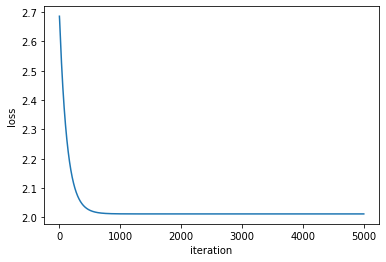

In [ ]:
import time
# A compromise way to set cuda, by detecting cuda availability
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

n_sample,dim, target_dim = 10000,50,2
x_batch = torch.randn(n_sample,dim)
y_batch_target = torch.randn(n_sample,target_dim)
net = torch.nn.Linear(dim, target_dim)
log = []
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.5)

# set cuda device
net = net.to(device)

x_batch = x_batch.to(device)
y_batch_target = y_batch_target.to(device)

start_time = time.time()
for _ in range(5000):
    # set cuda device to the batch of data.

    y_batch = net(x_batch)
    loss = ((y_batch - y_batch_target) ** 2).sum(1).mean()
    log.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()
print(f'weight is {net.weight}\n')
print(f'bias is {net.bias}\n')
print(f'time cost {(end_time-start_time):.3f} on the device {device}')

%matplotlib inline
import matplotlib.pyplot as plt
plt.ylabel('loss')
plt.xlabel('iteration')
plt.plot(log)

## Parallel on GPU
To achieve parallel training on GPU, pytorch provides a helpful wrapper. 
However, we need to be careful about parallel wrapped model at training, saving, loading. 

In training, the loss will become multiple. To deal with this, use 'loss =  torch.mean(loss)' before backpropagation.

In saving, use 'torch.save(model.module.state_dict(), #FILE PATH#)'
in loading, use 'model.module.load_state_dict(torch.load(#FILE PATH#))'


In [ ]:
model = nn.Linear(3,2)
model = nn.DataParallel(model)
print(model)
print(model.module)

DataParallel(
  (module): Linear(in_features=3, out_features=2, bias=True)
)
Linear(in_features=3, out_features=2, bias=True)


In [ ]:
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  model = nn.DataParallel(model)

# The End